In [9]:
# Ridho Daffasyah 13519038
# Thomas Ferdinand Martin 13519099
# Algoritma Pencarian Jalur A*

import networkx as nx
import matplotlib.pyplot as plt
import math
from collections import deque
%matplotlib notebook

In [10]:
'''INISIASI CLASS'''
class Node:

    def __init__(self, name):
        self.name = name
        self.neighbours = []
        self.f = 0
        self.g = 0
        self.h = 0
        self.x = 0
        self.y = 0
    def AddNeighbour(self, neighbour):
        self.neighbours.append(neighbour)
    def GetG(self, g):
        return self.g
    def GetH(self, h):
        return self.h
    def GetNeighbour(self):
        return self.neighbours
    def FindF(self):
        return self.g + self.h

class Graph:

    def __init__(self):
        self.ListOfNode = []
        self.ListOFNodePosition = []
        self.AdjMatrix = []
        self.nNode = 0
    def InsertNode(self, node):
        self.ListOfNode.append(node)
    def GetNode(self, idx):
        try:
            return self.ListOfNode[idx]
        except:
            return None
    def GetNodeNeighbour(self, idx):
        return self.ListOfNode[idx].GetNeighbour()
    def ReadFromFile(self, filename):
        try:
            f = open("" + filename, "r")
        except:
            print("Salah memasukkan nama file")
            return
        i = 0
        lines = f.readlines()
        # Get n node
        self.nNode = int(lines[0].replace("\n", ""))
        # Get position
        for i in range (self.nNode):
            line = lines[i+1].replace("\n", "").split("|")
            # ["A", "2,3"]
            # versi 1
            node = Node(line[0])
            node.x = line[1].split(",")[0]
            node.y = line[1].split(",")[1]
            self.ListOfNode.append(node)
            # versi 2
            x = line[1].split(",")[0]
            y = line[1].split(",")[1]
            self.ListOFNodePosition.append((float(x), float(y)))
        # Get tetangga
        i = 0
        for i in range (self.nNode):
            line = lines[self.nNode+1+i].replace("\n", "").split(",")
            # Get Node
            node = self.ListOfNode[i]
            j = 0
            for adj in line[1:]:
                if adj == "1":
                    node.AddNeighbour(self.ListOfNode[j])
                j+=1
            self.ListOfNode[i] = node
    def PrintGraph(self):
        for node in self.ListOfNode:
            print(node.name, end =" ")
            for neighbour in node.neighbours:
                print(neighbour.name, end=" ")
            print("")

    def distance(self, node1, node2):
        if node1 == None or node2 == None:
            return 0
        return math.sqrt(pow((float)(node1.x)-(float)(node2.x),2) + pow((float)(node1.y)-(float)(node2.y),2))

    def HaversineDistance(self, node1, node2):
        R = 6378137
        dlat = self.rad((float)(node1.x) - (float)(node2.x))
        dlong = self.rad((float)(node1.y) - (float)(node2.y))
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(self.rad(node1.x))*math.cos(self.rad(node2.x))*math.sin(dlong/2)*math.sin(dlong/2)
        c = math.asin(math.sqrt(a))
        d = R *c
        return d
    
    def rad(self, x):
        return (float)(x)*math.pi/180

    def bobot(self, node_name1, node_name2):
        node1 = self.ListOfNode[self.GetNodeIdx(node_name1)]
        node2 = self.ListOfNode[self.GetNodeIdx(node_name2)]
        if node1.name in node2.neighbours:
            return self.distance(node1, node2)
        return 0
    
    def IsNodeInSet(self, node, list_node):
        for nodes in list_node:
            if node == nodes:
                return True
        return False

    def GetNodeIdx(self, node_name):
        i = 0
        for node in self.ListOfNode:
            if node.name == node_name:
                return i
            i+=1
            
    def GetListOfNode(self):
        return self.ListOfNode

    def getLowestF(self, openSet, fScore):
        lowest = float("inf")
        lowestNode = None
        for node in openSet:
            if fScore[node] < lowest:
                lowest = fScore[node]
                lowestNode = node
        return lowestNode
    
    def reconstructPath(self, cameFrom, goal):
        path = deque()
        node = goal
        path.appendleft(node)
        while node in cameFrom:
            node = cameFrom[node]
            path.appendleft(node)
        return path
    def getNodeFromName(self, node_name):
        for node in self.ListOfNode:
            if node.name == node_name:
                return node

def aStar(graph, start, goal):
    #Inisialisasi open list dan closed list
    start = graph.getNodeFromName(start)
    goal = graph.getNodeFromName(goal)
    
    cameFrom = {}
    openSet = set([start])
    closedSet = set()
    
    gScore = {} #untuk simpan nilai g
    fScore = {} #untuk simpan nilai f
    
    gScore[start] = 0 #set g score start node dengan 0
    fScore[start] = gScore[start]+graph.HaversineDistance(start,goal) #set f score start node 
    
    #iterasi selama openset tidak 0
    while (len(openSet) != 0):
        #set current node dengan node yang punya lowest f
        current = graph.getLowestF(openSet, fScore)
        #jika current node sama dengan yang dicari
        if current == goal:
            return (graph.reconstructPath(cameFrom, goal), fScore[current])
        #remove current node dari openSet
        openSet.remove(current)
        #tambahkan current node ke closedSet
        closedSet.add(current)
        #lakukan pencarian nilai f ke semua tetangga dari current node
        if (len(goal.neighbours)!=0):
            for neighbour in current.neighbours:
                node_neighbour = graph.getNodeFromName(neighbour.name)
                tentative_gScore = gScore[current] + graph.HaversineDistance(current, node_neighbour)
                if node_neighbour in closedSet:
                    continue
                if node_neighbour in gScore:
                    if tentative_gScore > gScore[node_neighbour]:
                        continue
                if node_neighbour not in closedSet or tentative_gScore < gScore[node_neighbour]:
                    cameFrom[node_neighbour] = current
                    gScore[node_neighbour] = tentative_gScore
                    fScore[node_neighbour] = gScore[node_neighbour] + graph.HaversineDistance(node_neighbour,goal)
                    if node_neighbour not in openSet:
                        openSet.add(node_neighbour)
        else :
            print("Tidak bisa akses kesana")
    path = deque()
    return (path, 0)

# Tuple node untuk visualisasi graf
def TupleOfEdge(listofnode, matrix, listofpos):
    listoftuple = []
    for i in range(len(listofnode)):
        for j in range(i, len(listofnode)):
            if matrix[i][j] == '1':
                edge = (listofnode[i], listofnode[j], {'weight': round(HaversineDistance(i, j, listofpos), 2), 'node_size': 500})
                listoftuple.append(edge)
    return listoftuple

def rad(x):
    return x*math.pi/180

# Menghitung jarak dengan haversine formula
def HaversineDistance(idx_node1, idx_node2, listofpos):
    R = 6378137
    node1 = listofpos[idx_node1]
    node2 = listofpos[idx_node2]
    dlat = rad(node1[0] - node2[0])
    dlong = rad(node1[1] - node2[1])
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(rad(node1[0]))*math.cos(rad(node2[0]))*math.sin(dlong/2)*math.sin(dlong/2)
    c = math.asin(math.sqrt(a))
    d = R *c
    return d

# Untuk testing
def EuclidianDistance(idx_node1, idx_node2, listofpos):
    node1 = listofpos[idx_node1]
    node2 = listofpos[idx_node2]
    x = node1[0] - node2[0]
    y = node1[1] - node2[1]
    return math.sqrt(x**2 + y**2)

# Tidak terpakai
def LongLatToXY(long, lat):
    return (6378137*math.cos(lat)*math.cos(long), 6378137*math.cos(lat)*math.sin(long))
def LongLatToX(long, lat):
    return (6378137*math.cos(lat)*math.cos(long))
def LongLatToY(long, lat):
    return (6378137*math.cos(lat)*math.sin(long))
def PrintHeuristic(nodes, nodespos, goal_node):
    idx = 0
    for i in range(len(nodes)):
        if nodes[i] == goal_node:
            idx = i
            break
    print("Jarak dari " + goal_node + " dalam meter : ")
    i = 0
    for node in nodespos:
        print(nodes[i], end=" : ")
        print(HaversineDistance(idx, i, nodespos))
        i+=1

In [11]:
'''INPUT NAMA FILE'''
filepath = "../test/"
file = input("Masukkan nama file: ")

Masukkan nama file: ITB.txt


In [12]:
''' FOR VISUALIZATION '''
astar_graph = Graph()
filename = filepath + file
try:
    f = open(filename, "r")
    astar_graph.ReadFromFile(filename)
    i = 0
    lines = f.readlines()
    ListOfNode = []
    ListOfNodePosition = []
    # Get n node
    nNode = int(lines[0].replace("\n", ""))
    AdjMatrix = [[] for i in range (nNode)]
    # Get position
    for i in range (nNode):
        line = lines[i+1].replace("\n", "").split("|")
        x = line[1].split(",")[0]
        y = line[1].split(",")[1]
        ListOfNodePosition.append((float(x), float(y)))
    # Get tetangga
    for i in range (nNode):
        line = lines[nNode+1+i].replace("\n", "").split(",")
        adj = line[1::]
        # Get Node
        ListOfNode.append(line[0])
        AdjMatrix[i] = adj
except:
    print("Salah memasukkan nama file")

<IPython.core.display.Javascript object>


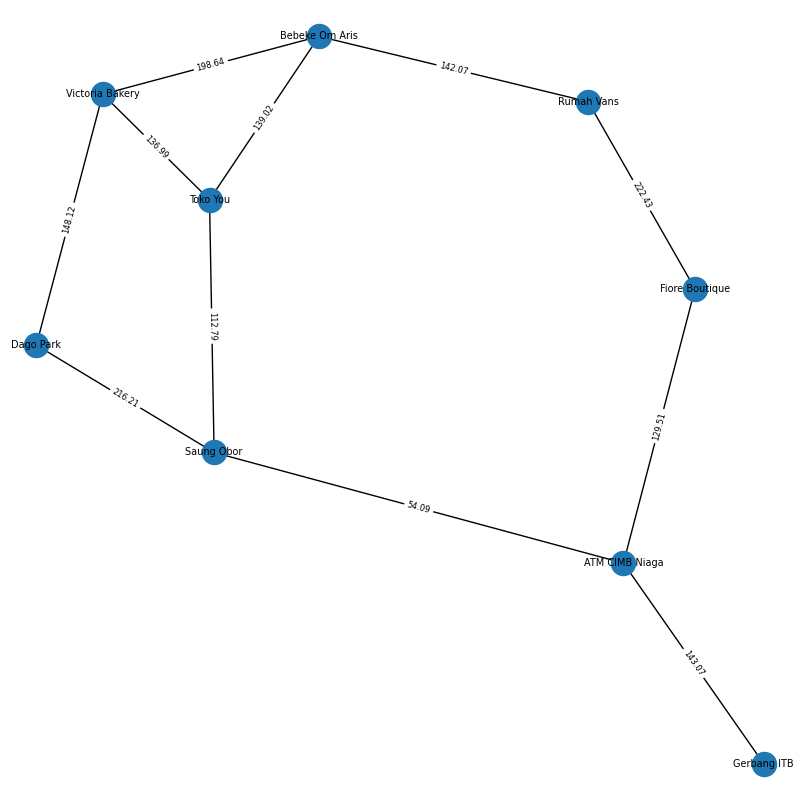

In [13]:
''' GRAPH VISUALIZATION '''
%matplotlib notebook
plt.figure(figsize=(8, 8))
G = nx.Graph()

# Menambahkan node
idx = 0
for node in ListOfNode:
    lat = ListOfNodePosition[idx][0]
    long = ListOfNodePosition[idx][1]
    G.add_node(node, pos=(lat*100, long*100))
    idx+=1

# Menambahkan sisi pada graf dengan bobot masing-masing sisi
G.add_edges_from(TupleOfEdge(ListOfNode, AdjMatrix, ListOfNodePosition))

# label untuk bobot pada graf
labels = nx.get_edge_attributes(G, "weight")

# Layout untuk menggambarkan graf dengan representasi pos
position=nx.get_node_attributes(G,'pos')
layout = nx.spring_layout(G, pos=position)
nx.draw(G, layout, with_labels=True, font_size = 7)

# Menambahkan label bobot
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, font_size = 6)

plt.axis("off")
plt.title("Tampilan Peta")
plt.show()

Daftar simpul: 
1. Fiore Boutique
2. Saung Obor
3. Toko You
4. Dago Park
5. Victoria Bakery
6. Bebeke Om Aris
7. ATM CIMB Niaga
8. Gerbang ITB
9. Rumah Vans
Masukkan nama node asal: Gerbang ITB
Masukkan nama node tujuan: Bebeke Om Aris

Jalur : 
Gerbang ITB
ATM CIMB Niaga
Saung Obor
Toko You
Bebeke Om Aris
Total Jarak : 448.9702270008344 meter

Jarak dari Bebeke Om Aris dalam meter : 
Fiore Boutique : 297.06158867993724
Saung Obor : 251.48203029533326
Toko You : 139.01804533770667
Dago Park : 343.03765604291306
Victoria Bakery : 198.6411556782538
Bebeke Om Aris : 0.0
ATM CIMB Niaga : 252.7866600883181
Gerbang ITB : 395.78621925439415
Rumah Vans : 142.06690426539743


<IPython.core.display.Javascript object>


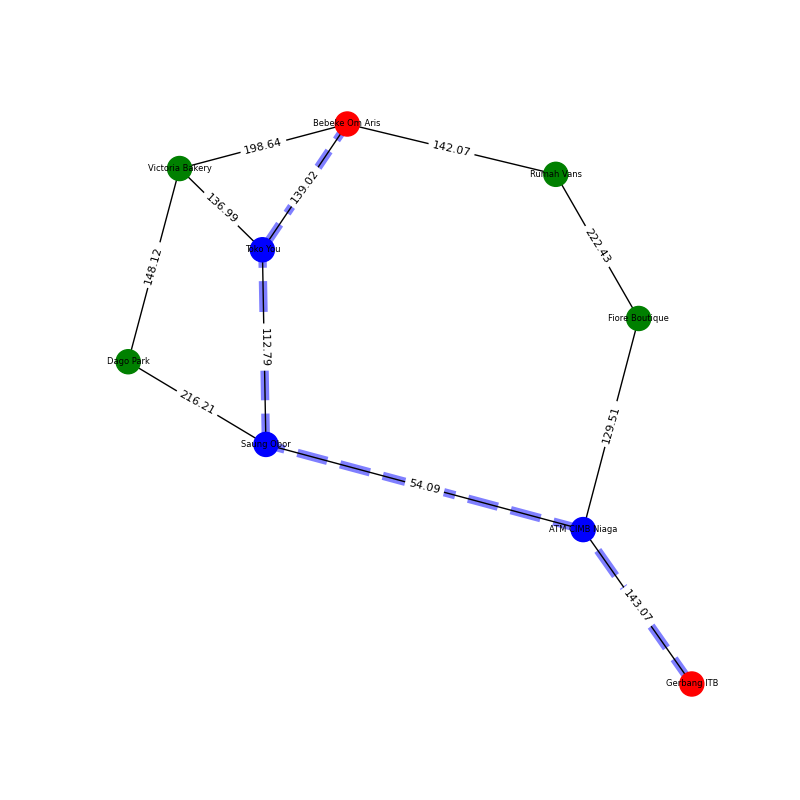

In [14]:
''' INPUT NODE ASAL DAN TUJUAN '''
print("Daftar simpul: ")
index = 1
for node in ListOfNode:
    print(index, end="")
    print(". " + node)
    index+=1
start_node = input("Masukkan nama node asal: ")
goal_node = input("Masukkan nama node tujuan: ")
print()
# Perhitungan path
try:
    (path,weight) = aStar(astar_graph, start_node, goal_node)
except:
    print("Titik awal atau tujuan tidak sesuai")
if (path):
    print("Jalur : ")
    for i in range(len(path)):
        print(path[i].name)
    print("Total Jarak : ", end="")
    print(weight, end=" ")
    print("meter")
else:
    print("Tidak ada jalur")
    
    
print()
''' ROUTE VISUALIZATION '''
%matplotlib notebook

# Tampilkan h(n)
PrintHeuristic(ListOfNode, ListOfNodePosition, goal_node)

routes = []
for route in path:
    routes.append(route.name)
    
# make a tuple untuk visualisasi 
edges = []
for i in range (len(routes)-1):
    edges.append((routes[i], routes[i+1]))

plt.figure(figsize=(8, 8))

# sisi graf
nx.draw_networkx_edges(
    G, layout, edgelist=edges, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# label sisi
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=labels, font_size = 8)

# warna node
color_map = []
for node in G:
    if node == start_node or node == goal_node:
        color_map.append('red')
    else:
        if node in routes:
            color_map.append('blue')
        else: 
            color_map.append('green')  
# insert layout
nx.draw(G, layout, node_color=color_map, with_labels=True, font_size = 6)
#plt.xlim(-1.5, 1.5)
#plt.ylim(-1.5, 1.5)
plt.axis("off")
plt.show()

In [17]:
"""DRAW MAP"""
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles,
    Circle, Marker, Rectangle, LayerGroup, AntPath
)
from ipywidgets import HTML

arraypos = []
for i in range(len(astar_graph.ListOfNode)):
    coord = [float(ListOfNodePosition[i][0]), float(ListOfNodePosition[i][0])]
    arraypos.append(coord)

# map center
center = ListOfNodePosition[0]
m = Map(center=center, zoom=15)

# map marker min 2
# TODO Label?, icon
marker = Marker(location=center, draggable=False)
marke2 = Marker(location=ListOfNodePosition[1], draggable=False)

# Create layer group
layer_group = LayerGroup(layers=(marker, marke2))
markers = []

# Create some layers
for position in ListOfNodePosition:
    marker = Marker(location=position, draggable=False)
    markers.append(marker)
    layer_group.add_layer(marker)

labels = []
if (path):
    for line in ListOfNode:
        message = HTML()
        labels.append(message)
        message.value = line
    print(len(labels))
    i = 0
    print(len(markers))
    for mark in markers:
        print(i)
        mark.popup = labels[i]
        i+=1
m.add_layer(layer_group)
m

9
9
0
1
2
3
4
5
6
7
8


Map(center=[-6.89148, 107.61313], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', …

In [18]:
"""DRAW ROUTE"""
# Get position based on path
coord = []
if(path):
    for i in range(len(path)):
        # catat posisi node
        point = [float(path[i].x), float(path[i].y)]
        coord.append(point)
        

# Draw Path
mPath = Map(center=(path[0].x, path[0].y), zoom=15)
markerStart = Marker(location=(path[0].x, path[0].y), draggable=False, rise_on_hover=True)
markerGoal = Marker(location=(path[len(path)-1].x, path[len(path)-1].y), draggable=False, rise_on_hover=True)

layer_group = LayerGroup(layers=(markerStart, markerGoal))
mPath.add_layer(layer_group)

#TODO: Hover pop up label
messageStart = HTML()
messageGoal = HTML()

messageStart.value = path[0].name
messageGoal.value = path[len(path) - 1].name

markerStart.popup = messageStart
markerGoal.popup = messageGoal

ant_path = AntPath(
    locations=coord,
    dash_array=[1, 10],
    delay=1000,
    color='#7590ba',
    pulse_color='#3f6fba'
)
layer_group.add_layer(ant_path)

mPath

Map(center=['-6.89321', '107.61043'], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…